<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Hierarchical Clustering 

© ExploreAI Academy

In this exercise, we will test our understanding of the core concepts of hierarchical clustering.

## Learning Objectives
By the end of this exercise, you should be able to:
* Implement an optimal agglomerative hierarchical clustering model.


Import the libraries and import the data that we will need for this exercise.

In [1]:
# data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/unsupervised_sprint/wine_clustering.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## The data
This dataset presents the outcomes of a chemical examination conducted on wines cultivated in a single region in Italy, originating from three distinct grape varieties. The analysis aimed to quantify the levels of 13 different components present in each type of wine.

The goal of applying hierarchical clustering on this dataset is to identify natural clusters to group similar wines together based on their attributes.

This clustering analysis could aid winemakers in quality control, product segmentation, or even in creating targeted marketing strategies based on the identified wine clusters.

## Exercises

### Exercise 1: Feature scaling
The first step in our process is feature scaling. By scaling the features to a uniform range, we prevent attributes with larger magnitudes from dominating the distance calculations, thus ensuring more balanced clustering results.

Perform feature scaling, using `StandardScaler` on the dataset to ensure that all features contribute equally to the clustering process.

In [5]:
#Your code here

scaler = StandardScaler()

X_scaled = scaler.fit_transform(data)

### Exercise 2: Hierarchical clustering and dendrogram visualisation

Next, we want to gain some insights into the hierarchical structure of our clusters to be able to determine the optimal number of clusters to use in our model by applying the hierarchical clustering algorithm to our scaled data.

Compute the hierarchical clustering of the data using the `ward` method then visualise the resulting clusters as a dendrogram. Based on the dendrogram, how many clusters should we use for our model?

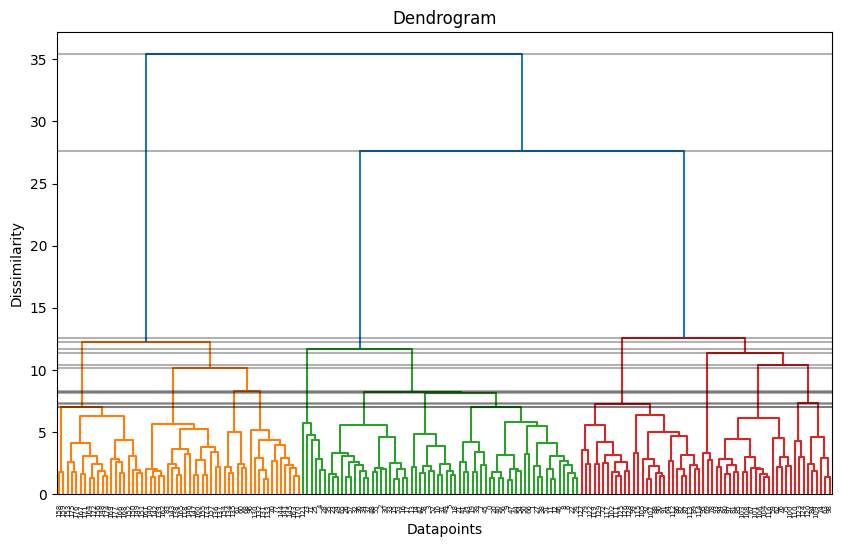

In [6]:
#Your code here

from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch

linkage_matrix = sch.linkage(X_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(linkage_matrix)

z = linkage_matrix[:,2]

for i in range(1,16):
    rng = [z[-i],z[-i]]
    dom = [0,40000]
    plt.plot(dom,rng,'black', alpha=0.3)

plt.title('Dendrogram')
plt.xlabel('Datapoints')
plt.ylabel('Dissimilarity')

plt.show()

### Question 3: Agglomerative clustering

Perform agglomerative clustering on the scaled data using the `AgglomerativeClustering` class from sklearn and 3 clusters.

Print the resulting cluster labels.

In [7]:
#Your code here

from sklearn.cluster import AgglomerativeClustering

ac_clf = AgglomerativeClustering(n_clusters=3, linkage='ward', metric='euclidean')
ac_clf.fit(X_scaled)

ac_clf.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

### Question 4: Interpretation of cluster characteristics

After performing hierarchical clustering with 3 clusters, we have assigned each wine sample to one of these clusters. To better understand the characteristics of each cluster, we want to examine the average values of the 13 components in our dataset across the samples within each cluster.

Calculate the mean values of the 13 components for each cluster and compare the clusters' characteristics.

**Note**: To get better visibility of the differences between clusters, it might be a good idea to visualise the cluster means using a **bar plot**, which, along with the dataframe, will provide a clearer and more intuitive understanding of the differences in chemical composition across the clusters.


 Based on your observations, how would you describe the differences between the clusters in terms of their chemical composition?


In [8]:
#Your code here

data['cluster_label'] = ac_clf.labels_
data['cluster_label'] = data['cluster_label'].astype('int64')

data.groupby('cluster_label').agg('mean').T

cluster_label,0,1,2
Alcohol,12.203966,13.061607,13.669219
Malic_Acid,1.938966,3.166607,1.970000
Ash,2.215172,2.412857,2.463125
Ash_Alcanity,20.208621,21.003571,17.528125
Magnesium,92.551724,99.857143,106.156250
Total_Phenols,2.262931,1.694286,2.850000
Flavanoids,2.088103,0.847857,3.009688
Nonflavanoid_Phenols,0.355345,0.449464,0.291094
Proanthocyanins,1.686552,1.129286,1.908125
Color_Intensity,2.895345,6.850179,5.450000


## Solutions

### Exercise 1: Feature scaling

In [9]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ss = scaler.fit_transform(data)
data_scaled = pd.DataFrame(ss)
data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.168151
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.168151
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.168151
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1.168151
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1.168151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,-0.040749
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,-0.040749
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,-0.040749
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,-0.040749


### Exercise 2: Hierarchical clustering and dendrogram visualisation

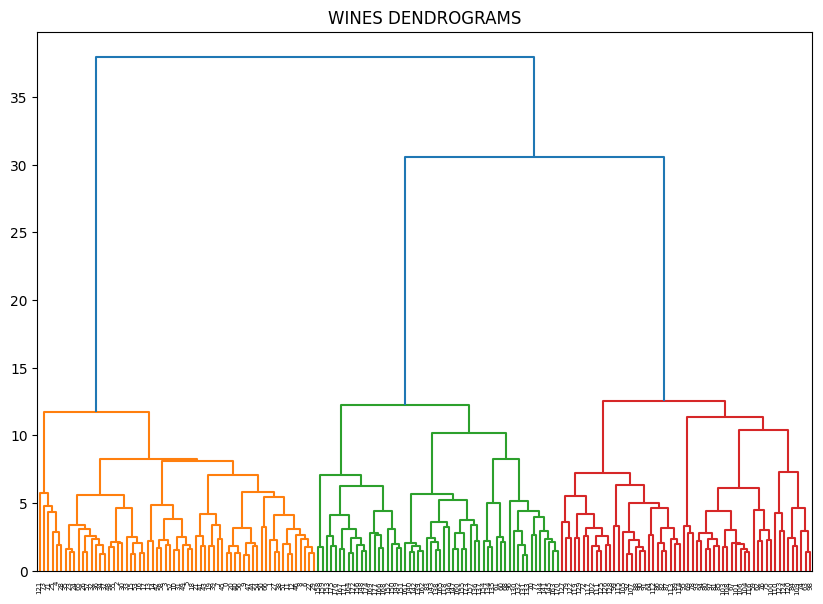

In [10]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("WINES DENDROGRAMS")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

Observing the arrangement of the branches and the lengths of the vertical lines, which indicate the merging of clusters, we see a clear separation into three main branches, each representing a cohesive cluster. Therefore, dividing the data into three clusters would be the most appropriate choice based on the dendrogram. 

### Question 3: Agglomerative clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
types = cluster.fit_predict(data_scaled)
types

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Question 4: Interpretation of cluster characteristics

In [12]:
# Calculate the mean values of the 13 components for each cluster
cluster_means = data.groupby(types).mean()
cluster_means


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_label
0,12.203966,1.938966,2.215172,20.208621,92.551724,2.262931,2.088103,0.355345,1.686552,2.895345,1.060000,2.862241,501.431034,0.0
1,13.669219,1.970000,2.463125,17.528125,106.156250,2.850000,3.009688,0.291094,1.908125,5.450000,1.071406,3.158437,1076.046875,2.0
2,13.061607,3.166607,2.412857,21.003571,99.857143,1.694286,0.847857,0.449464,1.129286,6.850179,0.721000,1.727321,624.946429,1.0


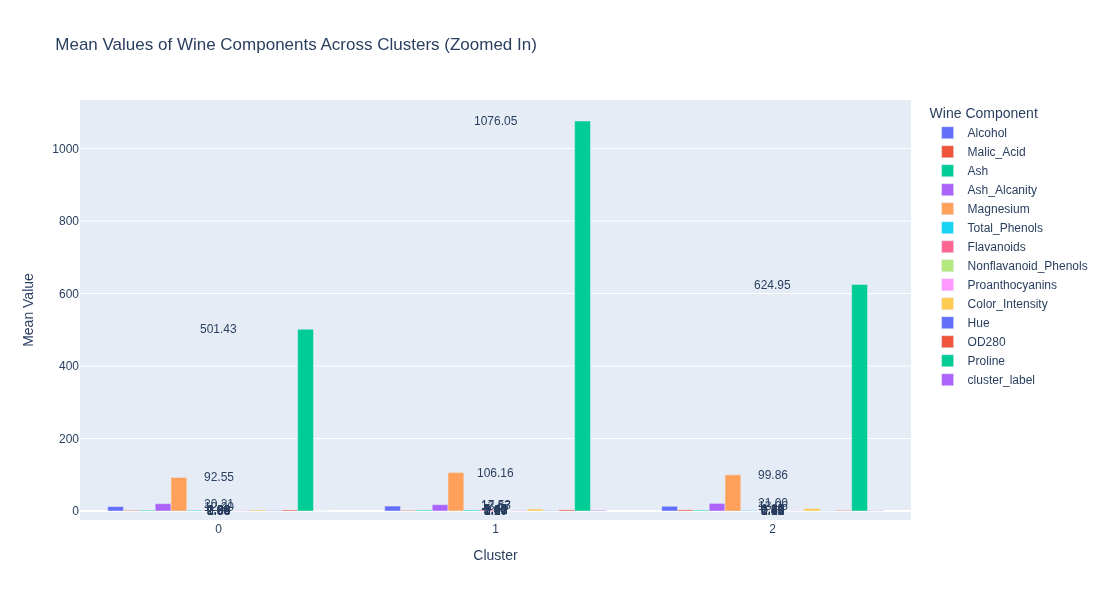

In [13]:
import plotly.express as px

# Convert the cluster means DataFrame to a format suitable for Plotly
cluster_means_plotly = cluster_means.reset_index().melt(id_vars=('index',), var_name='Wine Component', value_name='Mean Value')

# Plot the cluster means using Plotly
fig = px.bar(cluster_means_plotly, x='index', y='Mean Value', color='Wine Component',
             title='Mean Values of Wine Components Across Clusters (Zoomed In)',
             labels={'index': 'Cluster', 'Mean Value': 'Mean Value'},
             barmode='group', width=1000, height=600)  # Adjust width and height as needed

# Add text labels for each bar
for trace in fig.data:
    for idx, val in enumerate(trace.y):
        fig.add_annotation(x=trace.x[idx], y=val, text=f'{val:.2f}', showarrow=False)

fig.show()

The plot may appear condensed at first glance. Remember that in Plotly, we have the capability to zoom into the plot interactively. This feature allows us to explore smaller values more closely and gain a clearer understanding of the data.

The analysis of the cluster means reveals distinct differences in the chemical composition of wines across the three clusters. **Cluster 2** exhibits generally higher values for components such as alcohol, ash, magnesium, total phenols, flavanoids, proanthocyanins, hue, OD280, and proline compared to **Clusters 0 and 1**. On the other hand, **Cluster 1** shows higher color intensity and malic acid content. **Cluster 0** generally has lower values for most components compared to the other clusters. These findings suggest that wines within **Cluster 2** may possess different characteristics or qualities compared to those in **Clusters 0 and 1**, which could be valuable for winemakers in product segmentation or quality control efforts.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>